# Importing Libraries

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Folders and File Paths

In [11]:
Validation_Dataset = 'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\valid'
Trained_PDD_Model = "trained_plant_disease_model.keras"

#Test image
image_path = "C:\\Users\\jiten\\Downloads\\WhatsApp Image 2024-07-08 at 21.44.33_48a3c045.jpg"

# Test set Image Processing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
Validation_Dataset,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [13]:
cnn = tf.keras.models.load_model(Trained_PDD_Model)

#Visualising and Performing Prediction on Single image

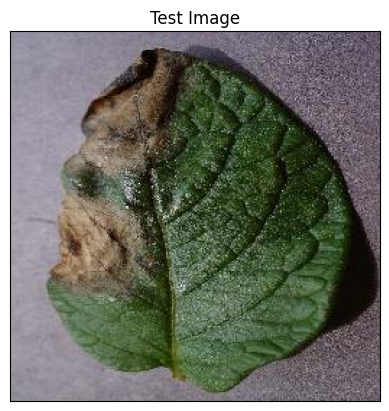

In [14]:
#Test Image Visualization
import cv2


# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [16]:
print(predictions)

[[1.7998655e-05 2.1718796e-03 7.9659774e-05 7.5097213e-04 5.0070103e-06
  9.5549905e-05 2.2963664e-05 8.5894062e-05 4.6781734e-06 7.2594441e-05
  1.3763647e-06 9.1896836e-06 6.2631764e-03 2.4457215e-04 1.4869147e-05
  2.9827666e-05 1.3650391e-04 2.0494147e-06 2.4472754e-03 5.6498444e-05
  1.5689114e-03 5.2181715e-01 7.5985410e-04 3.3509071e-04 2.1805713e-04
  1.1533242e-05 5.5940459e-03 7.1067421e-05 8.1460559e-05 6.8447213e-03
  4.4824460e-01 2.9467403e-05 2.4849112e-05 3.9613983e-04 1.0300368e-03
  2.3177575e-04 8.0068850e-07 2.2793772e-04]]


In [17]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

21


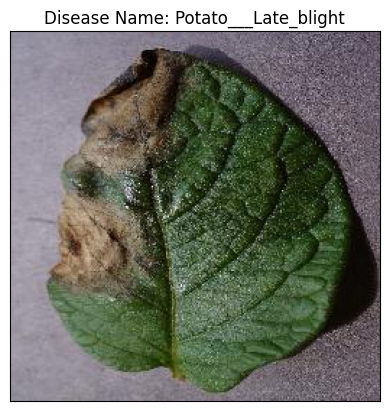

In [18]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()